# MS_Rich1

In [20]:
#%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from pandas import DataFrame
from IPython.display import display
import numpy as np
pd.options.display.max_columns = None
pd.options.display.max_rows = 200
import matplotlib.pyplot as plt
import scipy.stats as stats
import pylab
from sklearn.svm import SVR
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from pylab import *
matplotlib.style.use('ggplot')

In [21]:
admissions=pd.read_csv('MAIN_DF_10.csv')
admissions=admissions.drop(['Unnamed: 0'], axis=1)
admissions=admissions.reset_index(drop=True)
print(admissions.shape)
print('unique SUBJECT_ID:', admissions.SUBJECT_ID.nunique())
print('unique HADM_ID   :', admissions.HADM_ID.nunique())
print('unique ICUSTAY_ID:', admissions.ICUSTAY_ID.nunique())
admissions.head()

(23055, 125)
unique SUBJECT_ID: 17469
unique HADM_ID   : 21650
unique ICUSTAY_ID: 23055


,SUBJECT_ID,HADM_ID,ICUSTAY_ID,GENDER,AGE_AD,TYPE_AD,ETHNICITY,LOS,BMI,I_VEN,NI_VEN,ALBUMIN,BUN,CREATININE,GLUCOSE,HTOCRIT,LACTIC,PCO2A,PHA,PHD,PLATELETC,PO2A,SAO2,SODIUM,TBILIRUBIN,WBC,FIO2,RR,SPO2,ABPD,ABPM,ABPS,HR,NBPD,NBPM,NBPS,TEMP,PrevDays,INSMcaid,INSMcare,INSPvate,FCU_CCU,FCU_CSRU,FCU_MICU,FCU_SICU,FCU_TSICU,GCS_E_None,GCS_ESpon,GCS_EPain,GCS_ESpch,GCS_MAbFl,GCS_MAbex,GCS_MFlwd,GCS_MLoPa,GCS_MNore,GCS_MObCo,GCS_VConf,GCS_VInWo,GCS_VInso,GCS_VNORe,GCS_VNRET,GCS_VOrie,S_TEMP_Cold,S_TEMP_Cool,S_TEMP_Hot,S_TEMP_Warm,FW12,FW14,FW15,FW23,FW33,FW50,FW52,FW57,FW7,hfail,carr,vdis,pcirc,pvasc,htens,paralysis,oneur,chpul,dunc,dcom,hthy,rfail,ldis,pulc,aids,lymphoma,mcancer,solid_tumor,rhart,coath,obesity,wlost,flele,blane,defane,alch,drg,psychoses,depression,elixvw,elix29,elix30,apsiii,icu_flag,oasis,gcs,uo,surg,saps,sapsii,potass,bicsc,comsco,sofa,coagulation,liver,cardiovascular,cns,renal
0,23,124321,234044,1,75.26000,1,1,1.1862,21.7,0,0,NaN,14.0,0.6,136.0,36.9,NaN,NaN,NaN,NaN,208.0,NaN,NaN,144.0,NaN,14.8,NaN,14.0,100.0,74.0,86.0,181.0,77.0,45.0,50.0,67.0,35.4,2.67,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,31,0,24,15.0,6445.0,0,19,39,0.0,0.0,0,1,0.0,NaN,1.0,0.0,0.0
1,34,144319,290505,1,90.89934,1,1,1.5824,27.4,0,0,NaN,36.0,1.6,116.0,35.9,NaN,NaN,NaN,NaN,343.0,NaN,NaN,139.0,NaN,7.1,60.0,14.0,98.0,NaN,NaN,NaN,72.0,66.0,78.0,112.0,36.1,0.00,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,33,0,40,14.0,875.0,0,21,36,0.0,0.0,0,3,0.0,NaN,1.0,1.0,1.0
2,36,165660,241249,1,72.73000,0,1,4.3483,32.7,1,0,2.8,19.0,0.9,126.0,36.3,1.0,60.0,7.29,NaN,174.0,58.0,94.0,139.0,0.6,15.3,100.0,20.0,91.0,NaN,NaN,NaN,94.0,72.0,84.0,122.0,37.4,1.81,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,8,8,27,0,23,15.0,2030.0,1,14,31,0.0,0.0,0,5,1.0,NaN,1.0,0.0,0.0
3,85,112077,291697,1,76.85000,1,1,1.9909,31.8,0,0,NaN,17.0,1.4,114.0,26.4,NaN,NaN,NaN,NaN,24.0,NaN,NaN,137.0,NaN,8.3,NaN,39.0,99.0,NaN,NaN,NaN,136.0,87.0,99.0,166.0,37.0,0.00,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7,6,15,47,0,35,15.0,1650.0,0,19,34,0.0,3.0,0,5,3.0,NaN,1.0,0.0,1.0
4,107,182383,252542,1,69.66000,1,0,1.0806,31.3,0,0,NaN,36.0,5.8,125.0,40.3,NaN,NaN,NaN,NaN,303.0,NaN,NaN,139.0,NaN,14.2,NaN,19.0,97.0,NaN,NaN,NaN,64.0,67.0,88.0,155.0,36.7,0.00,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,6,14,15,43,0,23,15.0,NaN,0,21,42,3.0,0.0,0,5,0.0,NaN,1.0,0.0,4.0


In [22]:
admissions['LOS_C']=np.where((admissions['LOS']>0)&(admissions['LOS']<1), '0-1',
                              np.where((admissions['LOS']>=1)&(admissions['LOS']<2), '1-2',
                                  np.where((admissions['LOS']>=2)&(admissions['LOS']<4), '2-4',
                                          np.where((admissions['LOS']>=4)&(admissions['LOS']<6), '4-6','>6'))))
admissions['LOS_C'].value_counts()

1-2    7883
2-4    6156
0-1    3873
>6     2957
4-6    2186
Name: LOS_C, dtype: int64

In [23]:
admissions['LOS_C']=np.where(admissions['LOS_C']=='0-1', 1,
                              np.where(admissions['LOS_C']=='1-2', 1,
                                  np.where(admissions['LOS_C']=='2-4', 0,
                                          np.where(admissions['LOS_C']=='4-6', 0,0))))
admissions['LOS_C'].value_counts()

1    11756
0    11299
Name: LOS_C, dtype: int64

In [24]:
admissions['LOS_C'].value_counts()[1]/admissions['LOS_C'].value_counts().sum()

0.50991108219475167

In [25]:
admissions.isnull().sum().sort_values(ascending=False)[:23]

SAO2              17081
ALBUMIN           14559
PHD               14115
ABPM              13737
ABPS              13731
ABPD              13712
TBILIRUBIN        12842
liver             12090
PCO2A             11549
PO2A              11491
PHA               11479
FIO2              10948
LACTIC            10837
uo                  972
gcs                 351
cns                 351
cardiovascular      307
bicsc               225
coagulation         203
potass              124
renal                38
FCU_CCU               0
TEMP                  0
dtype: int64

In [26]:
admissions['renal'].value_counts()

0.0    12866
1.0     5109
2.0     1916
4.0     1619
3.0     1507
Name: renal, dtype: int64

In [27]:
admissions['uo'].value_counts()

 900.000000     98
 0.000000       95
 1400.000000    90
 1500.000000    89
 1300.000000    83
 950.000000     83
 1900.000000    83
 1200.000000    83
 1000.000000    82
 2000.000000    82
 1250.000000    81
 1550.000000    80
 1450.000000    76
 600.000000     76
 1600.000000    76
 1350.000000    75
 1100.000000    73
 800.000000     72
 1050.000000    71
 1150.000000    71
 2250.000000    69
 1700.000000    69
 1800.000000    69
 1650.000000    69
 2400.000000    63
 750.000000     62
 1950.000000    61
 1850.000000    61
 400.000000     60
 2200.000000    60
 2300.000000    60
 2100.000000    57
 1625.000000    57
 500.000000     57
 1225.000000    55
 850.000000     55
 1575.000000    55
 1750.000000    55
 650.000000     54
 700.000000     54
 300.000000     54
 2050.000000    52
 1175.000000    50
 2500.000000    50
 1810.000000    50
 2150.000000    49
 1425.000000    49
 2350.000000    47
 1675.000000    46
 550.000000     45
 100.000000     45
 2800.000000    44
 1275.000000

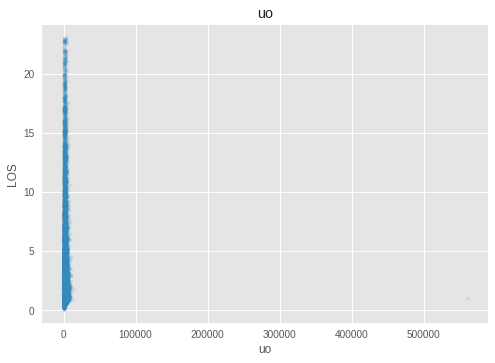

In [28]:
admissions.plot.scatter(x='uo',y='LOS',alpha=0.10, s=10)
#plt.xlim(-5, 80)
plt.title('uo')
plt.show()

In [29]:
admissions['uo']=admissions['uo'].mask(admissions['uo'].gt(7000))
admissions['uo']=admissions['uo'].mask(admissions['uo'].lt(-50))

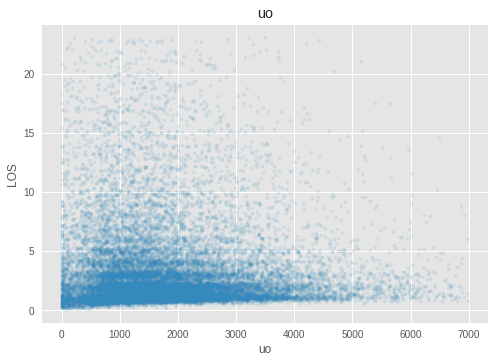

In [30]:
admissions.plot.scatter(x='uo',y='LOS',alpha=0.10, s=10)
#plt.xlim(-5, 80)
plt.title('uo')
plt.show()

In [31]:
admissions.isnull().sum().sort_values(ascending=False)[:23]

SAO2              17081
ALBUMIN           14559
PHD               14115
ABPM              13737
ABPS              13731
ABPD              13712
TBILIRUBIN        12842
liver             12090
PCO2A             11549
PO2A              11491
PHA               11479
FIO2              10948
LACTIC            10837
uo                 1086
gcs                 351
cns                 351
cardiovascular      307
bicsc               225
coagulation         203
potass              124
renal                38
FCU_CCU               0
TEMP                  0
dtype: int64

In [32]:
admissions=admissions.drop(['LOS'], axis=1)
admissions.shape

(23055, 125)

In [33]:
admissions=admissions.drop(['icu_flag'], axis=1)
admissions.shape

(23055, 124)

In [34]:
admissions['PO2A'].groupby(admissions['GENDER']).mean()

GENDER
0    190.981058
1    207.025496
Name: PO2A, dtype: float64

Better fill missing values by gender

In [35]:
admissions['SAO2'] = admissions['SAO2'].groupby(admissions['GENDER']).transform(
    lambda x: x.fillna(np.round(x.mean(),2)))
admissions['ALBUMIN'] = admissions['ALBUMIN'].groupby(admissions['GENDER']).transform(
    lambda x: x.fillna(np.round(x.mean(),2)))
admissions['PHD'] = admissions['PHD'].groupby(admissions['GENDER']).transform(
    lambda x: x.fillna(np.round(x.mean(),2)))
admissions['ABPM'] = admissions['ABPM'].groupby(admissions['GENDER']).transform(
    lambda x: x.fillna(np.round(x.mean(),2)))
admissions['ABPS'] = admissions['ABPS'].groupby(admissions['GENDER']).transform(
    lambda x: x.fillna(np.round(x.mean(),2)))
admissions['ABPD'] = admissions['ABPD'].groupby(admissions['GENDER']).transform(
    lambda x: x.fillna(np.round(x.mean(),2)))
admissions['TBILIRUBIN'] = admissions['TBILIRUBIN'].groupby(admissions['GENDER']).transform(
    lambda x: x.fillna(np.round(x.mean(),2)))
admissions['PCO2A'] = admissions['PCO2A'].groupby(admissions['GENDER']).transform(
    lambda x: x.fillna(np.round(x.mean(),2)))
admissions['PO2A'] = admissions['PO2A'].groupby(admissions['GENDER']).transform(
    lambda x: x.fillna(np.round(x.mean(),2)))
admissions['PHA'] = admissions['PHA'].groupby(admissions['GENDER']).transform(
    lambda x: x.fillna(np.round(x.mean(),2)))
admissions['FIO2'] = admissions['FIO2'].groupby(admissions['GENDER']).transform(
    lambda x: x.fillna(np.round(x.mean(),2)))
admissions['LACTIC'] = admissions['LACTIC'].groupby(admissions['GENDER']).transform(
    lambda x: x.fillna(np.round(x.mean(),2)))
admissions['liver'] = admissions['liver'].groupby(admissions['GENDER']).transform(
    lambda x: x.fillna(np.round(x.mean(),2)))
admissions['uo'] = admissions['uo'].groupby(admissions['GENDER']).transform(
    lambda x: x.fillna(np.round(x.mean(),2)))
admissions['gcs'] = admissions['gcs'].groupby(admissions['GENDER']).transform(
    lambda x: x.fillna(np.round(x.mean(),2)))
admissions['cns'] = admissions['cns'].groupby(admissions['GENDER']).transform(
    lambda x: x.fillna(np.round(x.mean(),2)))
admissions['cardiovascular'] = admissions['cardiovascular'].groupby(admissions['GENDER']).transform(
    lambda x: x.fillna(np.round(x.mean(),2)))
admissions['bicsc'] = admissions['bicsc'].groupby(admissions['GENDER']).transform(
    lambda x: x.fillna(np.round(x.mean(),2)))
admissions['coagulation'] = admissions['coagulation'].groupby(admissions['GENDER']).transform(
    lambda x: x.fillna(np.round(x.mean(),2)))
admissions['potass'] = admissions['potass'].groupby(admissions['GENDER']).transform(
    lambda x: x.fillna(np.round(x.mean(),2)))
admissions['renal'] = admissions['renal'].groupby(admissions['GENDER']).transform(
    lambda x: x.fillna(np.round(x.mean(),2)))

In [36]:
#admissions=admissions.drop(['SAO2', 'ABPD', 'ABPS'], axis=1)
#admissions.shape

In [37]:
admissions=admissions.drop(['SUBJECT_ID', 'HADM_ID', 'ICUSTAY_ID'], axis=1)
admissions.shape

(23055, 121)

In [38]:
admissions.isnull().sum().sum()

0

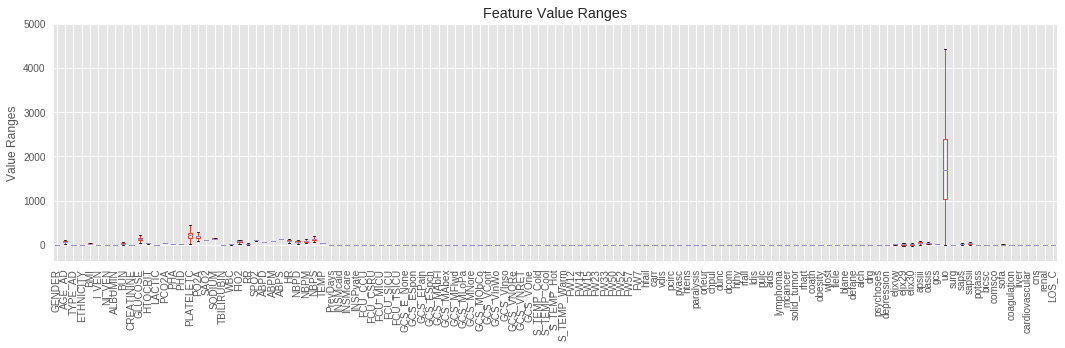

In [39]:
#admissions.iloc[:,0:30].boxplot()
plt.figure(figsize=(18,5))
admissions.boxplot()
plt.xticks(rotation=90)
#plt.xlabel("Attribute Index")
plt.ylabel(("Value Ranges"))
plt.ylim(ymax=5000)
plt.title('Feature Value Ranges')
plt.subplots_adjust(bottom=0.22)
#plt.savefig('Richfea.eps', format='eps', dpi=1200)
plt.show()

In [52]:
list(admissions.columns.values)

['ABPD',
 'ABPM',
 'ABPS',
 'AGE_AD',
 'ALBUMIN',
 'BMI',
 'BUN',
 'CREATININE',
 'ETHNICITY',
 'FCU_CCU',
 'FCU_CSRU',
 'FCU_MICU',
 'FCU_SICU',
 'FCU_TSICU',
 'FIO2',
 'FW12',
 'FW14',
 'FW15',
 'FW23',
 'FW33',
 'FW50',
 'FW52',
 'FW57',
 'FW7',
 'GCS_EPain',
 'GCS_ESpch',
 'GCS_ESpon',
 'GCS_E_None',
 'GCS_MAbFl',
 'GCS_MAbex',
 'GCS_MFlwd',
 'GCS_MLoPa',
 'GCS_MNore',
 'GCS_MObCo',
 'GCS_VConf',
 'GCS_VInWo',
 'GCS_VInso',
 'GCS_VNORe',
 'GCS_VNRET',
 'GCS_VOrie',
 'GENDER',
 'GLUCOSE',
 'HR',
 'HTOCRIT',
 'INSMcaid',
 'INSMcare',
 'INSPvate',
 'I_VEN',
 'LACTIC',
 'LOS_C',
 'NBPD',
 'NBPM',
 'NBPS',
 'NI_VEN',
 'PCO2A',
 'PHA',
 'PHD',
 'PLATELETC',
 'PO2A',
 'PrevDays',
 'RR',
 'SAO2',
 'SODIUM',
 'SPO2',
 'S_TEMP_Cold',
 'S_TEMP_Cool',
 'S_TEMP_Hot',
 'S_TEMP_Warm',
 'TBILIRUBIN',
 'TEMP',
 'TYPE_AD',
 'WBC',
 'aids',
 'alch',
 'apsiii',
 'bicsc',
 'blane',
 'cardiovascular',
 'carr',
 'chpul',
 'cns',
 'coagulation',
 'coath',
 'comsco',
 'dcom',
 'defane',
 'depression',
 'dr

In [83]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
ad = sc.fit_transform(admissions)

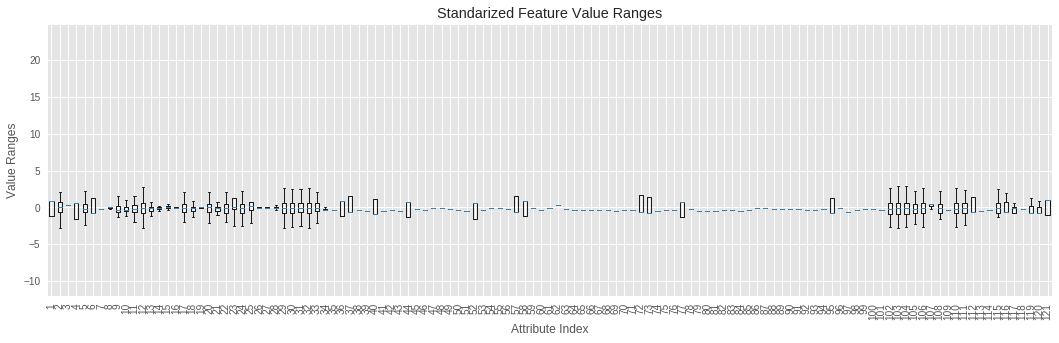

In [84]:
#array = admissions.iloc[:,1:9].values
#boxplot(ad[:,0:30])
plt.figure(figsize=(18,5))
boxplot(ad)
plt.xticks(rotation=90)
plt.xlabel("Attribute Index")
plt.ylabel(("Value Ranges"))
plt.title('Standarized Feature Value Ranges')
#plt.savefig('Richsta.eps', format='eps', dpi=1200)
show()

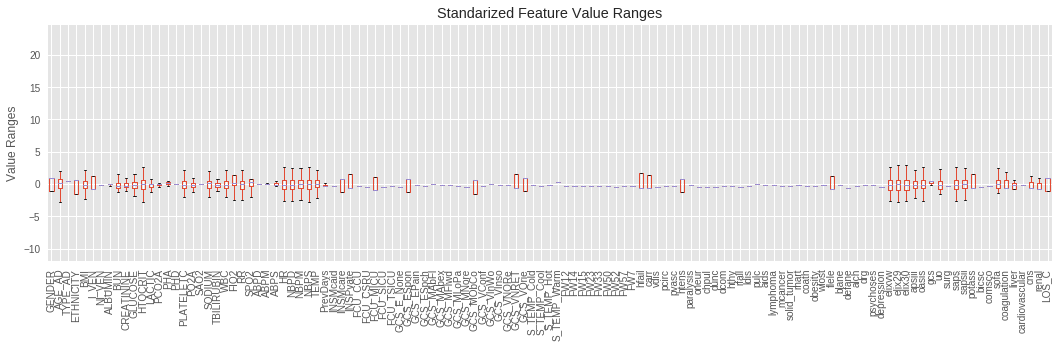

In [85]:
scaled_features = StandardScaler().fit_transform(admissions.values)
scaled_features_df = pd.DataFrame(scaled_features, index=admissions.index, columns=admissions.columns)
#admissions.iloc[:,0:30].boxplot()
plt.figure(figsize=(18,5))
scaled_features_df.boxplot()
plt.xticks(rotation=90)
#plt.xlabel("Attribute Index")
plt.ylabel(("Value Ranges"))
#plt.ylim(ymax=7500)
plt.title('Standarized Feature Value Ranges')
plt.subplots_adjust(bottom=0.22)
plt.savefig('Richfeasta.eps', format='eps', dpi=1200)
plt.show()

In [41]:
data_final_vars=admissions.columns.values.tolist()
y=['LOS_C']
x=[i for i in data_final_vars if i not in y]
data_final=admissions
data_final.shape
X=data_final[x]
y=data_final[y]

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
#y = sc.transform(y)

In [43]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
#print(result.summary())

         Current function value: 0.575639
         Iterations: 35


/home/jordi/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [44]:
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=34)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Logistic Regression

In [45]:
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

In [46]:
logreg = LogisticRegression()
model = logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)
model.score(X_test, y_test)

0.69582188810177825

In [47]:
standardizer = StandardScaler()
logit = LogisticRegression()
pipeline = make_pipeline(standardizer, logit)
# Create k-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=1)
# Do k-fold cross-validation
cv_results = cross_val_score(pipeline,X,y,cv=kf,
                             scoring="accuracy", # Loss function
                             n_jobs=-1) # Use all CPU scores
cv_results.mean()

0.69594427815394344

In [48]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
actr=np.round(100*logreg.score(X_train, y_train),4)
acte=np.round(100*logreg.score(X_test, y_test),4)
print('Accuracy of logistic regression classifier on train set:', actr)
print('Accuracy of logistic regression classifier on test set:', acte)

Accuracy of logistic regression classifier on train set: 70.3309
Accuracy of logistic regression classifier on test set: 69.5822


In [49]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[2161 1267]
 [ 837 2652]]


In [50]:
cm = metrics.confusion_matrix(y_test, y_pred)
score = np.round(logreg.score(X_test, y_test)*100,4)

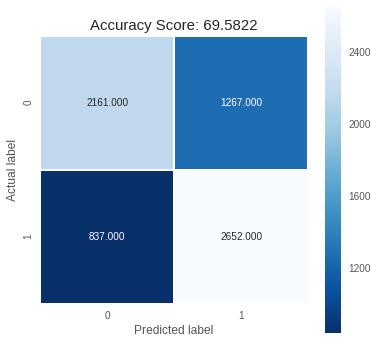

In [51]:
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)
plt.show()

In [52]:
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

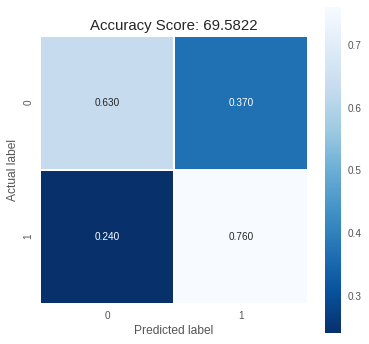

In [53]:
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)
plt.show()

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.72      0.63      0.67      3428
          1       0.68      0.76      0.72      3489

avg / total       0.70      0.70      0.69      6917



In [55]:
logreg.predict(X_test)

array([0, 1, 1, ..., 1, 0, 1])

In [56]:
logreg.predict_proba(X_test)

array([[ 0.51924284,  0.48075716],
       [ 0.38846646,  0.61153354],
       [ 0.39616447,  0.60383553],
       ..., 
       [ 0.21932927,  0.78067073],
       [ 0.86610115,  0.13389885],
       [ 0.15135627,  0.84864373]])

In [57]:
logreg.predict_proba(X_test)[::,1]

array([ 0.48075716,  0.61153354,  0.60383553, ...,  0.78067073,
        0.13389885,  0.84864373])

# Random Forest

In [58]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=10, random_state = 42)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
ttac=np.round(metrics.accuracy_score(y_test, y_pred)*100,4)
trac=np.round(clf.score(X_train, y_train)*100,4)
print("Accuracy test:",ttac)
print("Accuracy train:",trac)

Accuracy test: 69.3653
Accuracy train: 98.8908


In [59]:
clf1=RandomForestClassifier(n_estimators=100, random_state = 42)
clf1.fit(X_train,y_train)
y_pred=clf1.predict(X_test)
print("Accuracy test:",np.round(metrics.accuracy_score(y_test, y_pred)*100,4))
print("Accuracy train:",np.round(clf.score(X_train, y_train)*100,4))

Accuracy test: 72.835
Accuracy train: 98.8908


Put more trees is not the solution! OVERFITTING

In [60]:
RFC = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(RFC, X, y, cv = 10, scoring='accuracy')
scores.mean()

0.7347646987287243

In [61]:
RFC.fit(X_train,y_train)
y_pred=RFC.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.72863958363452364

In [62]:
RFC.score(X_train, y_train)

1.0

In [63]:
feature_imp = pd.Series(RFC.feature_importances_,index=x).sort_values(ascending=False)[:50]

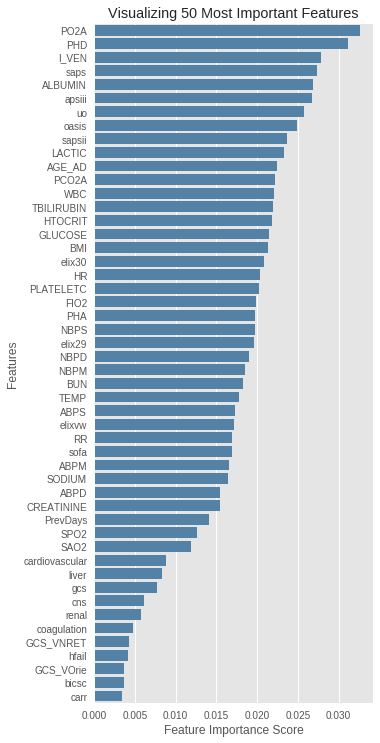

In [64]:
%matplotlib inline
plt.figure(figsize=(5,12.5))
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index, color='steelblue')
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing 50 Most Important Features')
plt.legend()
plt.show()

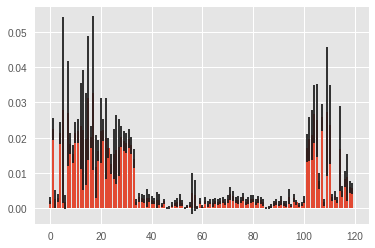

In [65]:
importance = RFC.feature_importances_
importance = pd.DataFrame(importance, index=x, columns=["Importance"])
importance["Std"] = np.std([tree.feature_importances_
                            for tree in RFC.estimators_], axis=0)
x = range(importance.shape[0])
y = importance.ix[:, 0]
yerr = importance.ix[:, 1]
plt.bar(x, y, yerr=yerr, align="center")
plt.show()

In [66]:
importance=importance.sort_values(by='Importance', ascending=False)

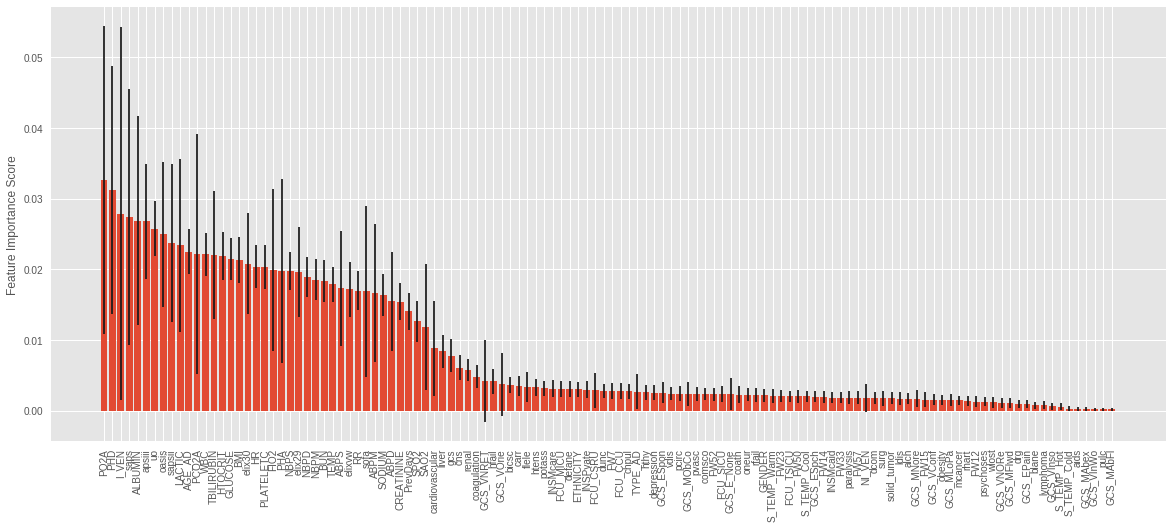

In [67]:
plt.figure(figsize=(20,8))
x = range(importance.shape[0])
y = importance.ix[:, 0]
yerr = importance.ix[:, 1]
plt.bar(x, y, yerr=yerr, align="center")
LABELS = importance.index
plt.xticks(x, LABELS, rotation='vertical')
plt.ylabel('Feature Importance Score')
#plt.margins(0.2)
#plt.subplots_adjust(bottom=0.25)
#plt.savefig('Rich11features.eps', format='eps', dpi=1200)
plt.show()

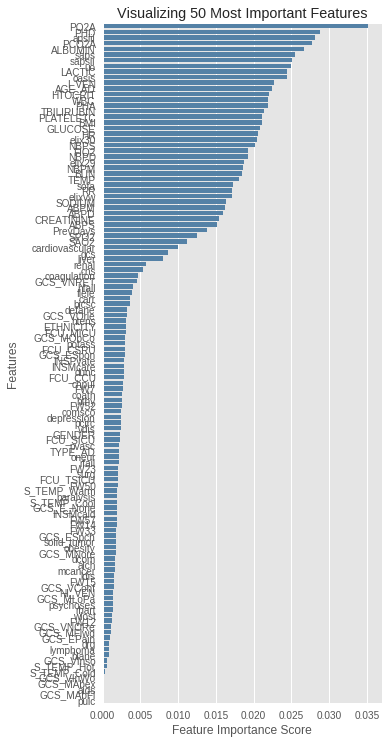

In [113]:
%matplotlib inline
plt.figure(figsize=(5,12.5))
sns.barplot(x=importance.Importance, y=importance.index,ci='sd', color='steelblue')
#sns.barplot(x=importance.Importance, y=importance.index, data=importance)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing 50 Most Important Features')
plt.legend()
plt.show()

# Random Forest Classifier

In [147]:
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(RFC, X, y, cv=10, method='predict_proba')
predicted1 = cross_val_predict(RFC, X, y, cv=10)
acrff=np.round(metrics.accuracy_score(y, predicted1)*100,4) 

# Log Reg

In [119]:
logreg = LogisticRegression()
pp = cross_val_predict(logreg, X, y, cv=10, method='predict_proba')
pp1= cross_val_predict(logreg, X, y, cv=10)
mmmm=np.round(metrics.accuracy_score(y, pp1)*100,4)

# Neural Networks

In [121]:
X_test.shape

(6917, 120)

In [123]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(64, input_dim=120, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(X_train, y_train,
          epochs=25,
          batch_size=128)
score1 = model.evaluate(X_test, y_test, batch_size=128)
score2 = model.evaluate(X_train, y_train, batch_size=128)
score1 = np.round(score1[1]*100,4)
score2 = np.round(score2[1]*100,4)

Epoch 1/25
16138/16138 [==============================] - 0s 23us/step - loss: 0.7281 - acc: 0.5711
Epoch 2/25
16138/16138 [==============================] - 0s 12us/step - loss: 0.6493 - acc: 0.6293
Epoch 3/25
16138/16138 [==============================] - 0s 13us/step - loss: 0.6212 - acc: 0.6620
Epoch 4/25
16138/16138 [==============================] - 0s 12us/step - loss: 0.6089 - acc: 0.6791
Epoch 5/25
16138/16138 [==============================] - 0s 15us/step - loss: 0.5975 - acc: 0.6850
Epoch 6/25
16138/16138 [==============================] - 0s 12us/step - loss: 0.5902 - acc: 0.6907
Epoch 7/25
16138/16138 [==============================] - 0s 12us/step - loss: 0.5858 - acc: 0.6964
Epoch 8/25
16138/16138 [==============================] - 0s 12us/step - loss: 0.5790 - acc: 0.7037
Epoch 9/25
16138/16138 [==============================] - 0s 13us/step - loss: 0.5735 - acc: 0.7086
Epoch 10/25
16138/16138 [==============================] - 0s 12us/step - loss: 0.5701 - acc: 0.7077

In [124]:
print('test :', score1)
print('train:', score2)

test : 71.2014
train: 75.4864


In [125]:
from keras import models
from keras import layers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
np.random.seed(0)

In [126]:
def create_network():
    
    model = Sequential()
    model.add(Dense(64, input_dim=120, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
    
    return model

In [127]:
neural_network = KerasClassifier(build_fn=create_network, 
                                 epochs=25, 
                                 batch_size=100, 
                                 verbose=0)

In [128]:
np.mean(cross_val_score(neural_network, X, y, cv=10))

0.7235322548049391

In [129]:
nn = cross_val_predict(neural_network, X, y, cv=10, method='predict_proba')
nn1 = cross_val_predict(neural_network, X, y, cv=10)
nnnn=np.round(metrics.accuracy_score(y, nn1)*100,4)

# KNeighbors Classifier

In [134]:
from sklearn.neighbors import KNeighborsClassifier

In [135]:
hh=[]
for i in range (1,51):
    kn=KNeighborsClassifier(n_neighbors=i)
    kkk = cross_val_predict(kn, X, y, cv=10, method='predict_proba')
    kkk1= cross_val_predict(kn, X, y, cv=10)
    kkkk=np.round(metrics.accuracy_score(y, kkk1)*100,4)
    hh.append(kkkk)

In [136]:
yy=list(range(1,51))

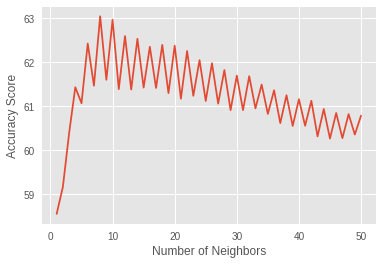

In [149]:
plt.plot(yy,hh)
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy Score')
#plt.title()
plt.savefig('Rich11neigh.eps', format='eps', dpi=1200)
plt.show()

In [138]:
kn=KNeighborsClassifier(n_neighbors=8)
kkk = cross_val_predict(kn, X, y, cv=10, method='predict_proba')
kkk1= cross_val_predict(kn, X, y, cv=10)
kkkk=np.round(metrics.accuracy_score(y, kkk1)*100,4)

# Results

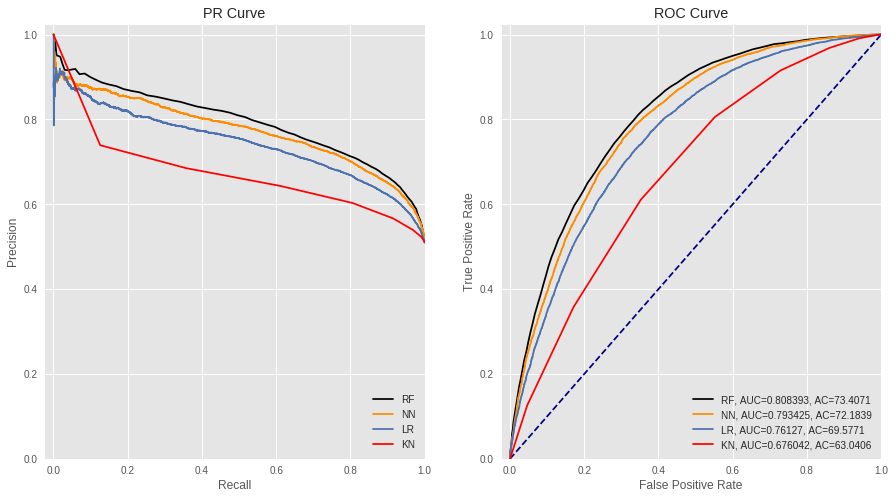

In [150]:
from sklearn.metrics import classification_report,confusion_matrix,auc,precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(1,2,1)
ax1.set_xlim([-0.025,1])
ax1.set_ylim([0,1.025])
ax1.set_xlabel('Recall')
ax1.set_ylabel('Precision')
ax1.set_title('PR Curve')

ax2 = fig.add_subplot(1,2,2)
ax2.plot([0, 1], [0, 1], color='navy', linestyle='--')
ax2.set_xlim([-0.025,1])
ax2.set_ylim([0,1.025])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve')

#y_pred_proba=best_grid.predict(X_test)
y_pred_proba=predicted[::,1]
fpr, tpr, _ = metrics.roc_curve(y,  y_pred_proba)
p,r,_ = precision_recall_curve(y,y_pred_proba)
auc = np.round(metrics.roc_auc_score(y, y_pred_proba),6)
ax2.plot(fpr,tpr,label="RF, AUC="+str(auc)+", AC="+str(acrff),color='black')
ax1.plot(r,p,label='RF',color='black')
#plt.legend(loc=4)

#y_pred_proba = model.predict_proba(X_test)
y_pred_proba=nn[::,1]
fpr, tpr, _ = metrics.roc_curve(y,  y_pred_proba)
p,r,_ = precision_recall_curve(y,y_pred_proba)
auc = np.round(metrics.roc_auc_score(y, y_pred_proba),6)
ax2.plot(fpr,tpr,label="NN, AUC="+str(auc)+", AC="+str(nnnn),color='darkorange')
ax1.plot(r,p,label='NN',color='darkorange')
#ax2.legend(loc=4)

for w,k in zip([1],'bgrcmykw'):
    #lr_model = LogisticRegression(class_weight={0:1,1:w})
    #lr_model.fit(X_train,y_train)
    #pred_prob = lr_model.predict_proba(X_test)[:,1]
    #pred_prob = logreg.predict_proba(X_test)[::,1]
    pred_prob=pp[::,1]
    p,r,_ = precision_recall_curve(y,pred_prob)
    tpr,fpr,_ = roc_curve(y,pred_prob)
    auc = np.round(metrics.roc_auc_score(y, pred_prob),6)
    ax1.plot(r,p,c=k,label='LR')
    ax2.plot(tpr,fpr,c=k,label='LR, AUC='+str(auc)+", AC="+str(mmmm))

#y_pred_proba=svclassifier.predict_proba(X_test)[:,1]
y_pred_proba=kkk[::,1]
fpr, tpr, _ = metrics.roc_curve(y,  y_pred_proba)
p,r,_ = precision_recall_curve(y,y_pred_proba)
auc = np.round(metrics.roc_auc_score(y, y_pred_proba),6)
ax2.plot(fpr,tpr,label="KN, AUC="+str(auc)+", AC="+str(kkkk),color='red')
ax1.plot(r,p,label='KN',color='red')
#plt.legend(loc=4)

ax1.legend(loc='lower right')    
ax2.legend(loc='lower right')
plt.savefig('Rich11roc.eps', format='eps', dpi=1200)
plt.show()